In [1]:
import scanpy as sc
import pandas
import matplotlib.pyplot as plt
import seaborn

In [2]:
adata_met = sc.read_h5ad('./data/scrna_mets_10wk_t_other_combined.h5ad')

In [3]:
pal = {'B cells': '#1f77b4',
 'Innate-like T': '#C2B280',
 'LN Treg': '#279e68',
 'DC': '#d62728',
 'IL10+ Treg': '#DCD300',
 'IL10- Treg': '#008856',
 'newly activated CD8': (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 'CD8aa': '#BE0032',
 'PD1+ CD4': (0.4, 0.7607843137254902, 0.6470588235294118), # '#e377c2',
 'PD1+ CD8': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), # '#b5bd61',
 #'cytotoxic CD4/Innate-like T cells mixed': (0.5529411764705883, 0.6274509803921569, 0.796078431372549), # '#17becf',
 'Th17': '#aec7e8',
 'gdT': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), # '#ffbb78',
 'NK': '#98df8a',
 'Granulocytes': '#ff9896',
 'ILC': '#c5b0d5',
 'Monocytes': '#c49c94',
 'CD4 effector': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), # '#f7b6d2',
 'Macrophage': '#dbdb8d',
 'CD8 naive': '#9edae5',
 'CD4 naive': '#ad494a'}

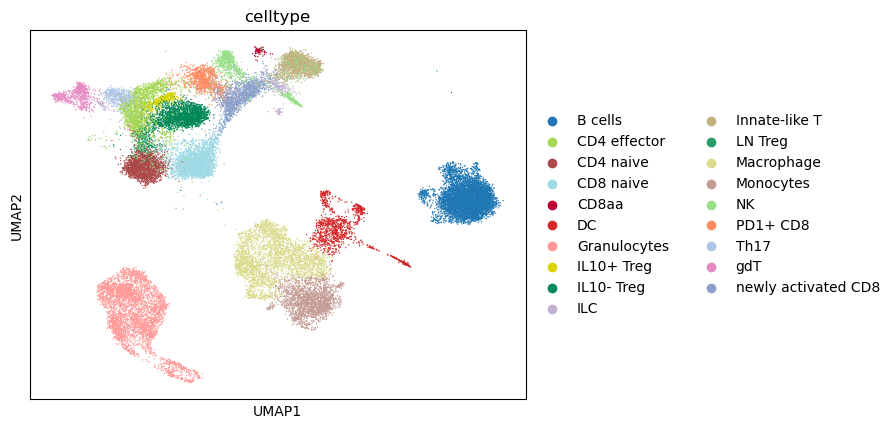

In [4]:
sc.pl.umap(adata_met, color='celltype', palette=pal)

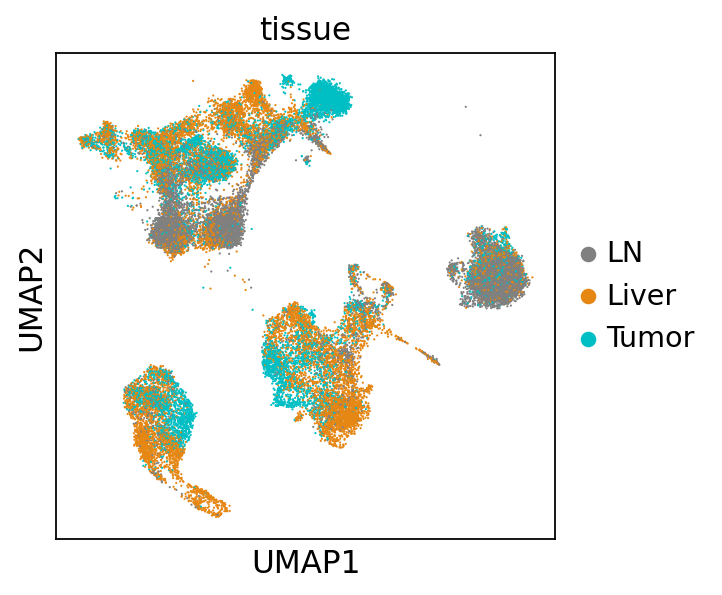

In [5]:
sc.set_figure_params(vector_friendly=True)
ax = sc.pl.umap(adata_met, color='tissue', show=False)

/tmp/ipykernel_1651925/2778233160.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.countplot(data=df, y='celltype', ax=ax[0],
/tmp/ipykernel_1651925/2778233160.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['celltype', 'tissue']).size().reset_index(name='count')


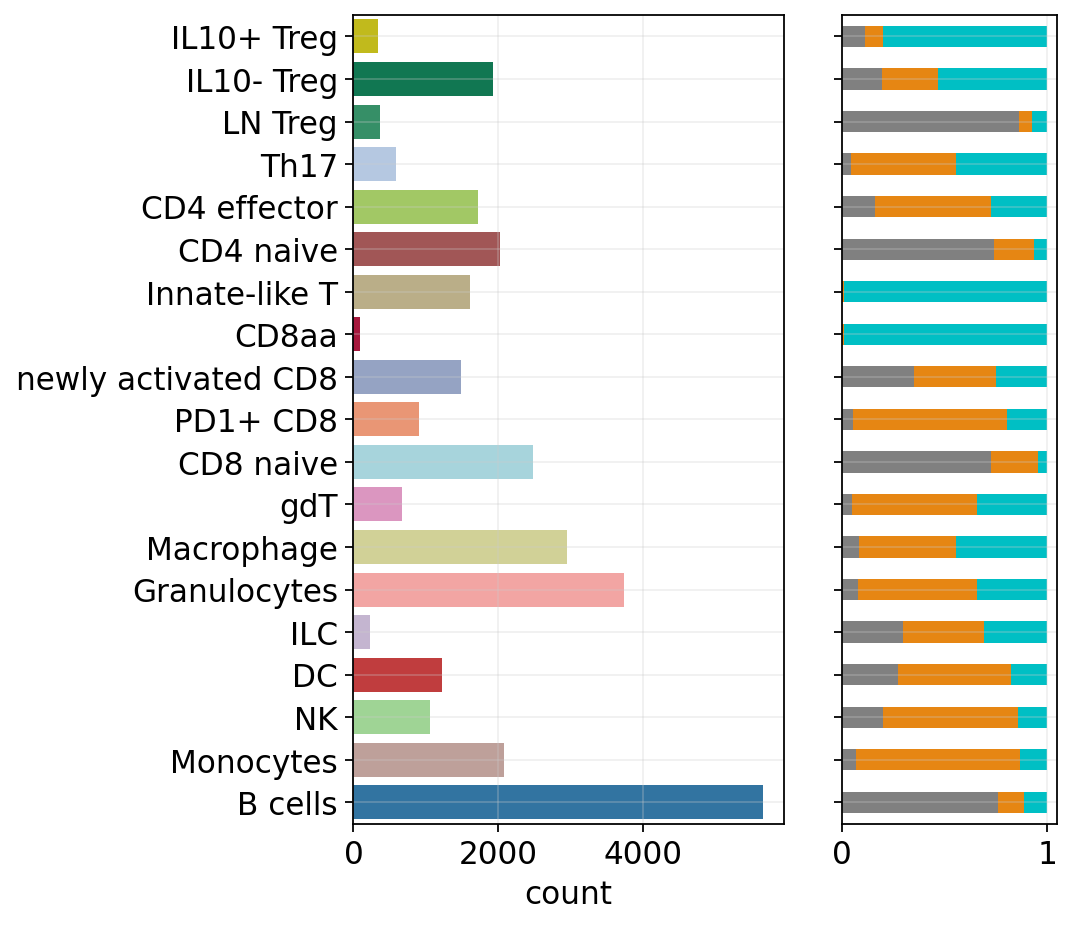

In [6]:
df = adata_met.obs.copy()
celltype_order = ['IL10+ Treg', 'IL10- Treg', 'LN Treg', 'Th17', 'CD4 effector', 'CD4 naive', 
                               'Innate-like T', 'CD8aa', 'newly activated CD8', 'PD1+ CD8', 'CD8 naive', 'gdT', 
                  'Macrophage', 'Granulocytes', 'ILC', 
                  'DC',
                  'NK', 'Monocytes', 'B cells', 
                  ]
df['celltype'] = pandas.Categorical(df['celltype'].values.tolist(),  
                   categories=celltype_order)
fig, ax = plt.subplots(1, 2, figsize=(7, 6), gridspec_kw={'width_ratios': [2, 1]}) # , sharey=True)
seaborn.countplot(data=df, y='celltype', ax=ax[0],
                  palette=pal) # adata_flex.uns['celltype_colors'])
df = adata_met.obs.copy()
df = df.groupby(['celltype', 'tissue']).size().reset_index(name='count')
df['celltype'] = pandas.Categorical(df['celltype'].values.tolist(),  
                   categories=celltype_order)
df = df.pivot(index='celltype', columns='tissue', values='count')
df = df.iloc[::-1]
df_sum = df.sum(1).values.copy()
df['LN'] = df['LN'].values/df_sum
df['Liver'] = df['Liver'].values/df_sum
df['Tumor'] = df['Tumor'].values/df_sum

df.plot.barh(stacked=True, color=adata_met.uns['tissue_colors'], ax=ax[1])
ax[1].set_yticklabels([])
ax[1].set_ylabel("")
ax[0].set_ylabel("")
plt.subplots_adjust(wspace=0, hspace=0)
ax[1].get_legend().remove()
ax[0].grid(visible=True, alpha=0.3)
ax[1].grid(visible=True, alpha=0.3)
plt.tight_layout()
#plt.savefig('./figures/mets_cell_counts.pdf', transparent=True)

In [7]:
df_liver = pandas.read_csv('./data/scrna_mets_milo_liver_vs_primary.csv', sep='\t')

In [8]:
liver_order = ['Innate-like T', 'IL10+ Treg', 'CD8aa', 'ILC', 'IL10- Treg', 'B cells', 'Mixed', 'Macrophage',
                 'gdT', 'Th17', 'CD4 effector', 'newly activated CD8', 'Granulocytes', 'DC', 'CD4 naive', 'PD1+ CD8',
                 'CD8 naive', 'NK', 'Monocytes']

/data1/lesliec/sneha/anaconda/envs/crc-env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


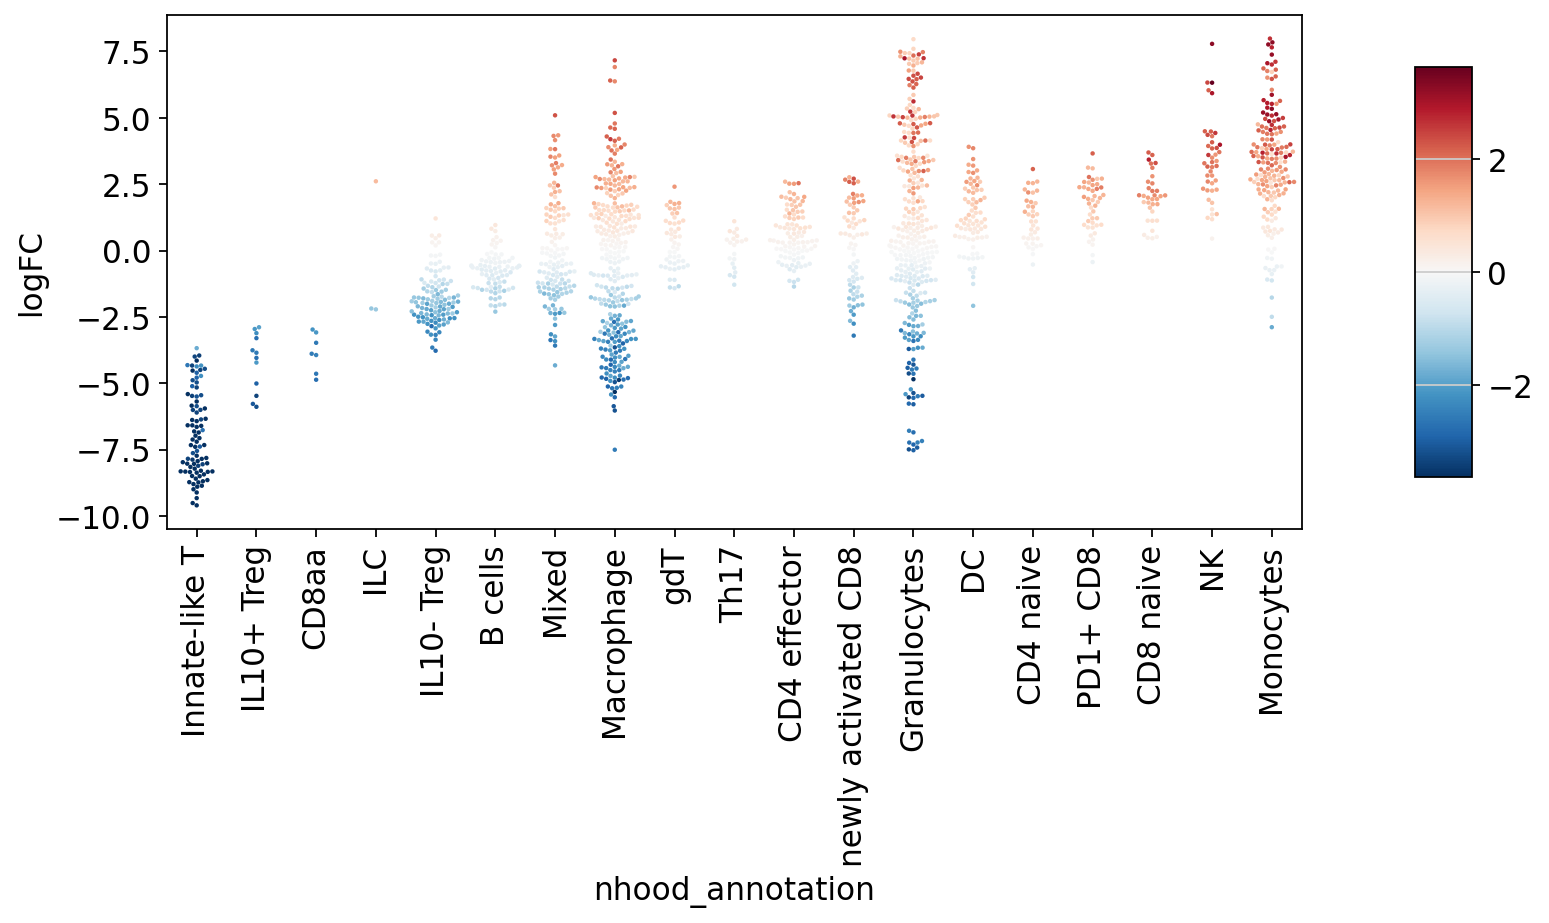

In [9]:
min_max = min(abs(df_liver['-log10(FDR)'].min()), df_liver['-log10(FDR)'].max())
norm = plt.Normalize(-min_max, min_max) # -0.3, 0.3) # df_tumor_t['-log10(FDR)'].min(), df_tumor_t['-log10(FDR)'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm)
plt.figure(figsize=(10, 6))
g = seaborn.swarmplot(data=df_liver, y="logFC", x="nhood_annotation", hue='-log10(FDR)', palette='RdBu_r', hue_norm=norm,
                     order=liver_order, 
                      size=2)
sm.set_array([])
cax=plt.gca().inset_axes([1.1, 0.1, 0.05, 0.8])
plt.gca().get_legend().remove()
g.get_figure().colorbar(sm, cax)
plt.gca().tick_params(axis='x', rotation=90)
plt.grid(axis='y')
plt.tight_layout()